## Random Forests (RF)
- Bagging
    - Base estimator: Decision Tree, Logistic Regression, Neural Network, ...
    - Each estimator is trained on a distinct bootstrap sample of the training set
    - Estimators use all features for training and prediction
- Further Diversity with Random Forest
    - Base estimator: Decision Tree
    - Each estimator is trained on a different bootstrap sample having the same size as the training set
    - RF introduces further randomization in the training of individual trees
    - $d$ features are sampled at each node without replacement
    $$ d < \text{total number of features} $$
- Random Forest: Training
![rf_training](image/rf_training.png)
- Random Forest: Prediction
![rf_predict](image/rf_prediction.png)
- Feature importance
    - Tree based methods: enable measuring the importance of each feature in prediction
    

### Train an RF regressor
In the following exercises you'll predict  predict the presence of heart disease in a patient from the [Heart disease UCI dataset](https://www.kaggle.com/ronitf/heart-disease-uci) dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

In [1]:
# Mathematical operation/data storage
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Cross validation
from sklearn.model_selection import train_test_split
# Model
from sklearn.ensemble import RandomForestClassifier
# Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [2]:
heart_df = pd.read_csv('./data/heart.csv', index_col=0)
heart_df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Columns description:

- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: refers to the presence of heart disease in the patient (1=yes, 0=no)

In [3]:
# To have a brief idea of whether the dataset is balance
# we could check
disease = len(heart_df[heart_df['target'] == 1])
no_disease = len(heart_df[heart_df['target']== 0])
print("num of case: ", disease)
print("num of control: ", no_disease)

num of case:  165
num of control:  138


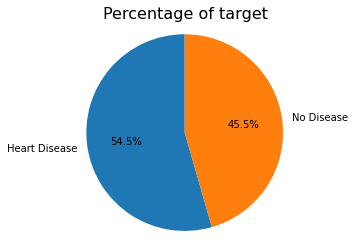

In [4]:
# Visualize by pie plot
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [5]:
# Get dependent&independent variables
X = heart_df.drop('target',1)
y = heart_df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
# Instantiate rf
# Try different combination of max_depth and random state (suggested max depth: 5, 8)
rf = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=1)

# Fit rf to the training set
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=1)

### Evaluate the RF regressor
You'll now evaluate the random forests regressor ```rf``` that you trained in the previous exercise.

In [8]:
# Predict the test set labels.
# score() return the mean accuracy on the given test data and labels.
y_pred = rf.predict(X_test)
y_pred = rf.predict(X_test)
score = rf.score(X_train, y_train)
print('Training Score:', score)
score = rf.score(X_test, y_test)
print('Testing Score:', score)

Training Score: 1.0
Testing Score: 0.8688524590163934


In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_value = auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)
print('AUV value:', auc_value)

F1 Score: 0.8750000000000001
AUV value: 0.8733836206896552


### Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor ```rf``` that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by ```rf```. Fortunately, this can be done easily thanks to plotting capabilities of ```pandas```.

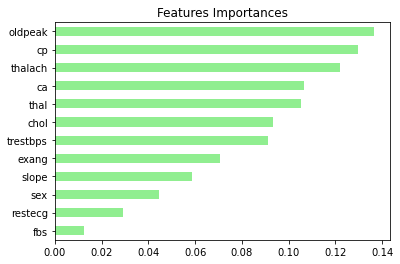

In [10]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.savefig('./image/feature_importances.png')

Apparently, ```hr``` and ```workingday``` are the most important features according to ```rf```. The importances of these two features add up to more than 30%.

> reference: https://github.com/goodboychan/goodboychan.github.io/blob/master/_notebooks/2020-06-04-01-Bagging-and-Random-Forests.ipynb